# Data Science Project

* Name: Author Name
* Email:


## TABLE OF CONTENTS 


- **[Introduction](#INTRODUCTION)<br>**
- **[OBTAIN](#OBTAIN)**<br>
- **[SCRUB](#SCRUB)**<br>
- **[EXPLORE](#EXPLORE)**<br>
- **[MODEL](#MODEL)**<br>
- **[iNTERPRET](#iNTERPRET)**<br>
- **[Conclusions/Recommendations](#CONCLUSIONS-&-RECOMMENDATIONS)<br>**
___

# INTRODUCTION

> Explain the point of your project and what question you are trying to answer with your modeling.



# OBTAIN

In [1]:
# Import standard packages
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

import nltk
from nltk import FreqDist,word_tokenize, regexp_tokenize, TweetTokenizer
from nltk.corpus import stopwords
from nltk import FreqDist
import string

from wordcloud import WordCloud

%matplotlib inline

# Set random seed
np.random.seed(27)

In [2]:
info_df = pd.read_csv('temp_data/app_info.csv')
info_df.head()

,screenshotUrls,ipadScreenshotUrls,appletvScreenshotUrls,artworkUrl60,artworkUrl512,artworkUrl100,artistViewUrl,supportedDevices,advisories,isGameCenterEnabled,...,description,trackId,artistId,artistName,genres,price,bundleId,version,wrapperType,userRatingCount
0,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,https://apps.apple.com/nl/developer/headspace-...,"iPhone5s-iPhone5s,iPadAir-iPadAir,iPadAirCellu...",NaN,False,...,Get happy. Stress less. Sleep soundly. Headspa...,493145008,384434796,Headspace Inc.,"Gezondheid en fitness,Productiviteit",0.0,com.getsomeheadspace.headspace,3.170.0,software,41045
1,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,https://apps.apple.com/nl/developer/calm-com/i...,"iPhone5s-iPhone5s,iPadAir-iPadAir,iPadAirCellu...",NaN,False,...,** Best of 2018 Award Winner ** — Apple\n\n** ...,571800810,571800813,Calm.com,"Gezondheid en fitness,Lifestyle",0.0,com.calm.calmapp,5.20.1,software,13922
2,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,https://apps.apple.com/nl/developer/maciej-lob...,"MacDesktop-MacDesktop,iPhone5s-iPhone5s,iPadAi...",NaN,False,...,stoic can help you live a happier and more tra...,1312926037,560803468,Maciej Lobodzinski,"Gezondheid en fitness,Lifestyle",0.0,com.mlobodzinski.Stoic,2021.23,software,325
3,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,https://apps.apple.com/nl/developer/happify-in...,"iPhone5s-iPhone5s,iPadAir-iPadAir,iPadAirCellu...",NaN,False,...,Happify's science-based activities and games c...,730601963,730601966,"Happify, Inc.","Gezondheid en fitness,Lifestyle",0.0,com.happify.Happify,2.10.4,software,23
4,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,https://apps.apple.com/nl/developer/shine/id12...,"iPhone5-iPhone5,iPadFourthGen-iPadFourthGen,iP...",NaN,False,...,**Featured as Best of 2020 by the App Store & ...,1293721589,1293721588,Shine,"Gezondheid en fitness,Lifestyle",0.0,com.shinetext.shine,4.16.1,software,88


In [3]:
pd.options.display.max_colwidth = None

In [4]:
path = r'temp_data'                     # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

In [5]:
all_files

['temp_data/stoic.csv',
 'temp_data/shine-calm-anxiety-stress.csv',
 'temp_data/moodfit.csv',
 'temp_data/slumber-fall-asleep-insomnia.csv',
 'temp_data/pzizz-sleep-nap-focus.csv',
 'temp_data/headspace-meditation-sleep.csv',
 'temp_data/breathe2relax.csv',
 'temp_data/fabulous-daily-routine-planner.csv',
 'temp_data/app-name-id.csv',
 'temp_data/breethe-meditation-sleep.csv',
 'temp_data/talkspace-therapy-counseling.csv',
 'temp_data/smiling-mind.csv',
 'temp_data/calm.csv',
 'temp_data/rootd-panic-attack-relief.csv',
 'temp_data/reflectly-journal-ai-diary.csv',
 'temp_data/whats-up-a-mental-health-app.csv',
 'temp_data/betterme-calm-sleep-meditate.csv',
 'temp_data/relax-meditation-guided-mind.csv',
 'temp_data/insight-timer-meditation-app.csv',
 'temp_data/cbt-i-coach.csv',
 'temp_data/meditopia-meditation-breathe.csv',
 'temp_data/moodtools-depression-aid.csv',
 'temp_data/moodmission.csv',
 'temp_data/noisli.csv',
 'temp_data/mindshift-cbt-anxiety-relief.csv',
 'temp_data/minddoc-

In [6]:
all_files.pop(-2)

'temp_data/app_info.csv'

In [7]:
all_files

['temp_data/stoic.csv',
 'temp_data/shine-calm-anxiety-stress.csv',
 'temp_data/moodfit.csv',
 'temp_data/slumber-fall-asleep-insomnia.csv',
 'temp_data/pzizz-sleep-nap-focus.csv',
 'temp_data/headspace-meditation-sleep.csv',
 'temp_data/breathe2relax.csv',
 'temp_data/fabulous-daily-routine-planner.csv',
 'temp_data/app-name-id.csv',
 'temp_data/breethe-meditation-sleep.csv',
 'temp_data/talkspace-therapy-counseling.csv',
 'temp_data/smiling-mind.csv',
 'temp_data/calm.csv',
 'temp_data/rootd-panic-attack-relief.csv',
 'temp_data/reflectly-journal-ai-diary.csv',
 'temp_data/whats-up-a-mental-health-app.csv',
 'temp_data/betterme-calm-sleep-meditate.csv',
 'temp_data/relax-meditation-guided-mind.csv',
 'temp_data/insight-timer-meditation-app.csv',
 'temp_data/cbt-i-coach.csv',
 'temp_data/meditopia-meditation-breathe.csv',
 'temp_data/moodtools-depression-aid.csv',
 'temp_data/moodmission.csv',
 'temp_data/noisli.csv',
 'temp_data/mindshift-cbt-anxiety-relief.csv',
 'temp_data/minddoc-

In [8]:
all_files.pop(8)

'temp_data/app-name-id.csv'

In [9]:
df_list = []

for filename in all_files:
    temp_df = pd.read_csv(filename)
    df_list.append(temp_df)

In [10]:
df = pd.concat(df_list, axis=0, ignore_index=True)

In [11]:
df

,review,title,userName,date,rating,isEdited,app_name,app_id,developerResponse
0,"I'm not really sure how I feel about this app. While it does ask you questions/give you prompts to get you talking about things, sometimes the questions are weird. I had one this morning, somewhere along the lines of ""what are you then, a mere body? a ration being."" And I'm staring at my screen like how do I even answer this if I don't understand the question? There's other ones that are similar and because I don't understand what it's asking me to write, sometimes I'll just put ""lol"" so I can move to the next page. Then when you're done with your questions it will ask if you feel better and mostly my answer has been no because the questions it gave me were weird. You can pick what questions you'd like to be asked everyday but none of them really jump out to me as something I'd want to answer daily besides the one sentence summary of your day but even that is whatever. I do like that it tracks your mood, would be cool to have another tracker for what is causing your mood instead of the sad to happy face scale. The quotes are cool too. I've been using the app for about 2 weeks now and I feel like maybe twice out of the 14 days, it's actually asked me something relevant. More often than not, I'm using the blank page entries instead but I could just write those in my actual journal. Perhaps this app isn't for me, but it seems to work for people.",Maybe I don't know how to use this app?,Jay2DaNaay,2021-04-20 12:43:19,3,False,stoic,1312926037,NaN
1,"I downloaded this app last week and it’s been on my home page since then. I’ve only started using this app a few days ago and OMG😳 This app is so beautiful. I’m only writing a review just so I can ask if you guys can put a password for the journal part because my mom looks through my phone and I don’t want her to read the things I write in there💀 Anyways, I do actually really love this app and its perfect from the bottom of those codes and to the top of the icon. It’s iconic honestly. Not to forget the fact that it’s been lifting burdens and weights off of my back when I type everything in details. It’s like a friend that I’ve always wanted, which is sad because none of my real (alive) friends are there for me and asks me how I am like how stoic is🥲 Ever since the app asked me the first question, I’ve poured allllll of the things I wanted to say and in details too. I- this app is like that one friend that you have that’s always there for you no matter what and genuinely cares for you so deeply and that you’re comfortable being around them even though you’ve only met last week. yknow? this app is my twin flame.",yuhhhhhh,kytedot,2021-04-03 14:27:52,5,False,stoic,1312926037,NaN
2,"Absolutely incredible. The focus breathing, the journaling, and the adaptability to each user. I have never seen such an app before. I have downloaded over 20 journaling apps, but I eventually always delete the app because I forget to journal because the app doesn’t help me. Now, this journaling app is incredible. I write 3-5 times a day and use its focus breathing exercises so much. This is the only app I want to actually support with money even though I am a stingy person.\n\n——\n\nUpdate: I do dislike the new feature where it asks you to think negatively to become grateful without being able to decline like last update. For those who are suffering depression, anxiety, and other mental issues, this is a big black hole that one can go into. I plead the developers to lock this feature away by being able to decline before the app asks you that question.",Absolutely Incredible - Better than Others,NemoTheCat,2021-01-25 20:15:12,5,False,stoic,1312926037,"{'id': 20686361, 'body': 'hey,\n\ncould you please ping me at m@stoicroutine.com so we could find the issue with forcing negative visualization? \n\nthere should be an option to skip it but i worry we messed it up.\n\nbest,\nmaciej', 'modified': '2021-01-27T12:52:23Z'}"
3,"This is 

In [14]:
df = df[df['review'].isna()==False]

In [15]:
df[df['isEdited']==True]

,review,title,userName,date,rating,isEdited,app_name,app_id,developerResponse
4,"I’ve written a couple app reviews for this app before, but I just want to put in that after using it for about three months now, I must say that stoic is quite a wonderful app! It gives you all sorts of options for things to do that really help my everyday mentality, like breathing excersize, meditations, and fear settings/thought excersize. A high recommend! I’d say my only issue with this app is probably that the morning routines are SO long. Honestly I don’t mind doing them, but I just wish there were options to choose the amount of questions asked. People are busy, not everyone has 30 minutes each morning to answer like 10 questions. Perhaps five or six? Also I like the meditation options they have, I only wish they had a few guided ones. That’s only a request, not a complaint though! My first point was a complaint.",High Recommend!!,Raimabird,2021-02-10 13:08:43,5,True,stoic,1312926037,"{'id': 20357398, 'body': 'could you check what hour you have in ‚your profile’ -> personalize -> start day at?\n\nbest,\nm.', 'modified': '2021-01-12T22:23:35Z'}"
17,"When an issue arose (and the issue was mine alone), the developer responded immediately and assisted me greatly. In the event other incorrectly associate this site with anything related to Ryan Holiday, as I did, they are not connected. \n\nOne app bug I do wonder about is why the daily count randomly restarts at one. Also, thought it might be cool if there was a way to print the journals (perhaps even commercially or bound- all or as a selection). Perhaps you can and I’m just not great with tech. Anyway…. Thank you for the email and I am sorry for the incorrect association.",Excellent Customer Service,Mark50998926,2021-05-18 03:27:09,4,True,stoic,1312926037,"{'id': 22856122, 'body': 'hej Mark,\n\nwe are not associated with mr. Holiday in any way (besides the fact that i personally admire his work)\n\nbest,\nmaciej\n\n', 'modified': '2021-05-17T15:50:36Z'}"
142,"I love this app and have been using it to maintain my commitment to meditation and mental health! Unfortunately, I find that usually at night, the check-in function gets glitchy and it’s impossible to move forward and complete it—at least, it appears incomplete. The next day, however, I discover that my attempts at entering information have gone through, to the tune of four or five times. So i’ll have 4 or 5 copies of the same “my gratitude” information, for example. Since I cannot erase them after the fact, I’m stuck with all of it. Irritating. Either fix the bug and make users able to remove what they entered.","Love the app, check-in is glitchy, though",zenma25,2021-06-21 17:42:07,4,True,shine-calm-anxiety-stress,1293721589,"{'id': 22512047, 'body': 'Hi there, thanks for reaching out! We’d love to look a bit further into this issue. Please contact our customer service team at help@shinetext.com with the relevant details, and we can help you get this sorted out.', 'modified': '2021-04-28T13:14:26Z'}"
152,"I wrote here over a year ago upset I was unable to receive the promised daily text. I still don’t get a text (unsure anyone does now), but it doesn’t matter because the intuitive push notifications arrive every morning and every night. They are a welcome inspiration to set the tone for each day and a thoughtful reflection to ponder every night. I am genuinely grateful for Shine.",Push notifications keep me going,indiawenden,2021-02-25 03:11:31,5,True,shine-calm-anxiety-stress,1293721589,"{'id': 8222588, 'body': 'Hi there. Thanks so much for your review. If you haven\'t already, please reach out to help@shinetext.com with the headline ""App Review"" and we\'d be happy to help resolve this for you.', 'modified': '2019-04-15T15:14:36Z'}"
220,It’s a great app I was able to find a half off code sent to me so I can enjoy the full benefits,It’s a great app,jazzseviin,2021-03-23 18:06:00,5,True,shine-calm-anxiety-stress,1293721589,"{'id': 2181

In [16]:
## Create a variable "corpus" containing all text
corpus = df['review'].to_list()

## Preview first 5 entries 
corpus[:5]

['I\'m not really sure how I feel about this app. While it does ask you questions/give you prompts to get you talking about things, sometimes the questions are weird. I had one this morning, somewhere along the lines of "what are you then, a mere body? a ration being." And I\'m staring at my screen like how do I even answer this if I don\'t understand the question? There\'s other ones that are similar and because I don\'t understand what it\'s asking me to write, sometimes I\'ll just put "lol" so I can move to the next page. Then when you\'re done with your questions it will ask if you feel better and mostly my answer has been no because the questions it gave me were weird. You can pick what questions you\'d like to be asked everyday but none of them really jump out to me as something I\'d want to answer daily besides the one sentence summary of your day but even that is whatever. I do like that it tracks your mood, would be cool to have another tracker for what is causing your mood in

In [18]:
','.join(corpus)

'I\'m not really sure how I feel about this app. While it does ask you questions/give you prompts to get you talking about things, sometimes the questions are weird. I had one this morning, somewhere along the lines of "what are you then, a mere body? a ration being." And I\'m staring at my screen like how do I even answer this if I don\'t understand the question? There\'s other ones that are similar and because I don\'t understand what it\'s asking me to write, sometimes I\'ll just put "lol" so I can move to the next page. Then when you\'re done with your questions it will ask if you feel better and mostly my answer has been no because the questions it gave me were weird. You can pick what questions you\'d like to be asked everyday but none of them really jump out to me as something I\'d want to answer daily besides the one sentence summary of your day but even that is whatever. I do like that it tracks your mood, would be cool to have another tracker for what is causing your mood ins

In [21]:
corpus

['I\'m not really sure how I feel about this app. While it does ask you questions/give you prompts to get you talking about things, sometimes the questions are weird. I had one this morning, somewhere along the lines of "what are you then, a mere body? a ration being." And I\'m staring at my screen like how do I even answer this if I don\'t understand the question? There\'s other ones that are similar and because I don\'t understand what it\'s asking me to write, sometimes I\'ll just put "lol" so I can move to the next page. Then when you\'re done with your questions it will ask if you feel better and mostly my answer has been no because the questions it gave me were weird. You can pick what questions you\'d like to be asked everyday but none of them really jump out to me as something I\'d want to answer daily besides the one sentence summary of your day but even that is whatever. I do like that it tracks your mood, would be cool to have another tracker for what is causing your mood in

In [22]:
## Convert Corpus to Tokens
tokens = word_tokenize(','.join(corpus))

In [23]:
## Check first 5 tokens
print(tokens[:5])

['I', "'m", 'not', 'really', 'sure']


In [24]:
## Get FreqDist and plot the 25 most_common tokens
freq = FreqDist(tokens)
freq.most_common(100)

[(',', 25179),
 ('I', 24499),
 ('.', 22469),
 ('to', 18003),
 ('and', 16851),
 ('the', 16097),
 ('’', 12579),
 ('a', 11890),
 ('it', 11263),
 ('app', 10278),
 ('for', 7520),
 ('is', 7246),
 ('this', 7239),
 ('of', 6974),
 ('!', 6588),
 ('you', 6547),
 ('my', 6505),
 ('me', 6008),
 ('that', 5296),
 ('have', 4534),
 ('in', 4206),
 ('s', 4147),
 ('with', 3907),
 ('but', 3899),
 ('t', 3893),
 ('so', 3742),
 ('on', 3097),
 ('It', 3042),
 ('can', 2771),
 ('was', 2586),
 ('like', 2539),
 ('not', 2516),
 ('be', 2299),
 ('love', 2299),
 ('are', 2298),
 ('This', 2273),
 ('has', 2246),
 ('really', 2162),
 ('just', 2159),
 ('m', 1964),
 ('get', 1925),
 ('or', 1858),
 ('more', 1853),
 ('The', 1837),
 ('been', 1759),
 ('all', 1746),
 ('your', 1739),
 ('meditation', 1667),
 ('day', 1626),
 ('do', 1615),
 ('free', 1582),
 ('ve', 1577),
 ('if', 1545),
 ('they', 1534),
 ('as', 1504),
 ('use', 1463),
 ('at', 1403),
 ('great', 1393),
 ('would', 1391),
 ('help', 1390),
 ('an', 1382),
 ('sleep', 1376),
 ('i

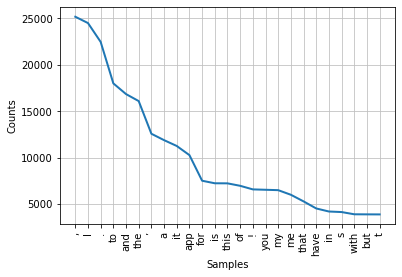

In [25]:
freq.plot(25);

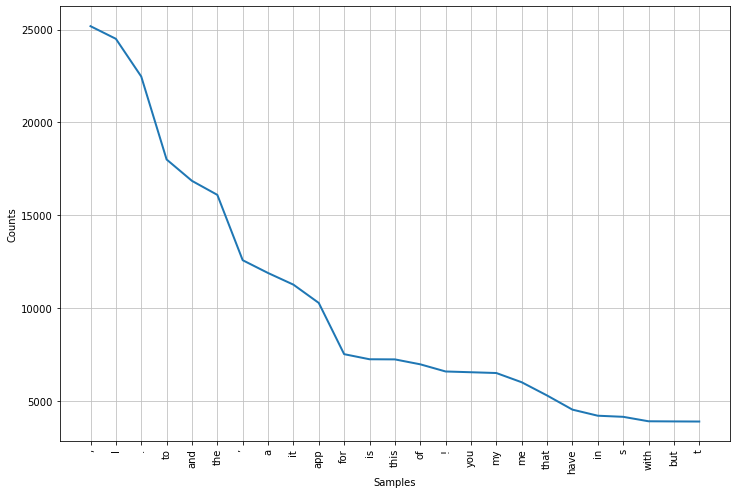

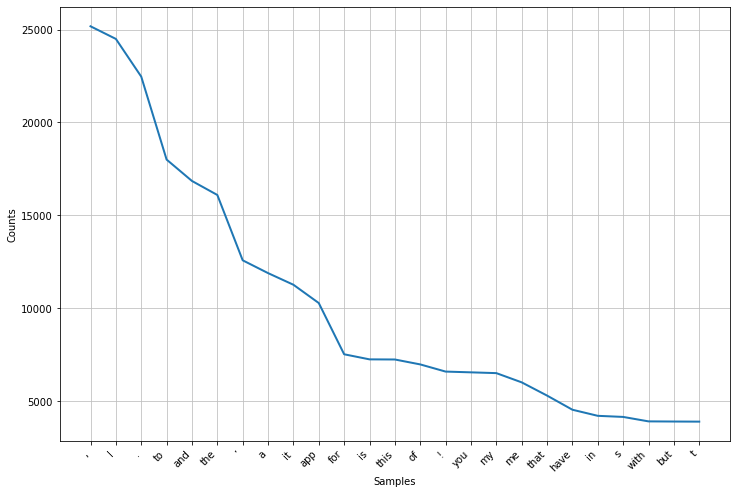

In [26]:
fig, ax = plt.subplots(figsize=(12,8))
freq.plot(25);

## Rotate 
ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=45,ha='right');
fig

# SCRUB

# EXPLORE

# MODEL

# iNTERPRET

# CONCLUSIONS & RECOMMENDATIONS

> Summarize your conclusions and bullet-point your list of recommendations, which are based on your modeling results.

# TO DO/FUTURE WORK

- 